$$\text{\Huge Scrap Work}$$

In [9]:
import numpy as np
from numba import njit
import math
import itertools as it
import random as rd
import time
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
a = 1
b = a

In [10]:
def test(a, b=3):
    return a+b

In [20]:
test(a=3,)

6

In [11]:
np.arange(2,4.5,.25)

array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25])

In [13]:
def iterate(x,y,n):
    z = 0
    for _ in range(n):
        z = z**2 + (x + 1J*y)
    return z

width = 1000
height = 1000

pic = Image.new('RGB', (width+100,height+100), (255, 255, 255))
pixels = pic.load()

for x in range(width):
    for y in range(height):
        h, k = width*(x+2)/(2), height*(1-y)/(2)
    if iterate(h,k,1000):
        pixels[h,k] = (0, 0, 255)
plt.imshow(np.asarray(pic))

IndexError: image index out of range

In [24]:
a = (np.array([1,2,3]),np.array([2,4,6]))

In [27]:
c = np.array([*a])

In [29]:
print(c)

[[1 2 3]
 [2 4 6]]


In [29]:
@njit
def testFunction(a:int,b=np.array([3,1.])):
    return b*a

In [30]:
testFunction(3)

array([9., 3.])

In [22]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [1]:
def test(a):
    if a == 3:
        return None
    else:
        return a

In [2]:
test(3)

In [16]:
A = np.array([0.])

In [20]:
type(A[0])

numpy.float64

In [3]:
def makeARandBinary(n,m):
    out = np.random.rand(n,m)
    for i in np.arange(len(out)):
        for j in np.arange(len(out[i])):
            out[i][j] = round(out[i][j])
    return out

In [4]:
def makeKindOfConvexRows(array):
    for row in array:
        index = 0
        while index < len(row):
            if row[index] == 1:
                for i in np.arange(index+1,len(row)):
                    if row[i] == 1:
                        row[index:i] = 1
                        index = i
            index = index + 1
    return array

def makeKindOfConvex(array):
    return makeKindOfConvexRows(makeKindOfConvexRows(makeKindOfConvexRows(makeKindOfConvexRows(array).T).T).T).T

def Force_plot(A,n):
    plt.rcParams['figure.figsize'] = [n, n]
    img = plt.pcolor(A, alpha=0.8, cmap="tab20", edgecolors='k', linewidths=2)
    plt.axis('off')
    plt.show()

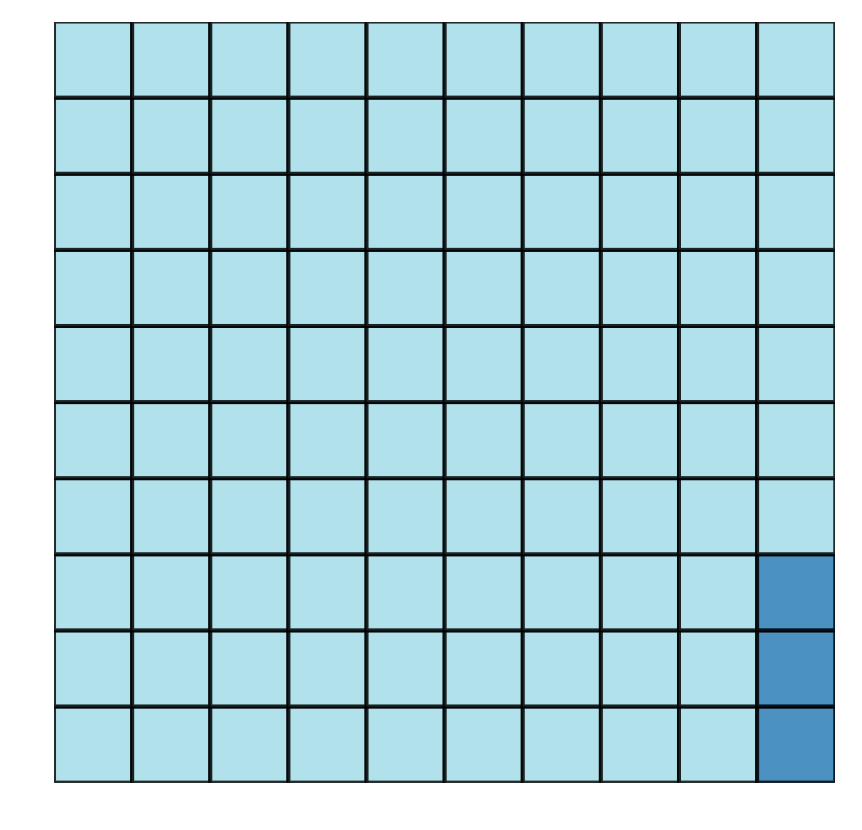

In [6]:
Force_plot(makeKindOfConvex(makeARandBinary(10,10)),7)

In [98]:
def delay(arg):
    start = time.time()
    time.sleep(1)
    print(time.time()-start)

In [99]:
start = time.time()
delay(2**999999)
print(time.time()-start)

1.0014028549194336
1.0063648223876953


In [100]:
%timeit 2**999999

5.48 ms ± 819 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
A = np.array([[0,0,0,0,0,0,0,1,0,1,0],
              [0,0,0,0,0,0,0,1,0,0,0],
              [0,1,0,0,1,0,1,1,0,1,0],
              [0,0,0,1,1,0,0,1,0,1,0],
              [0,1,1,1,1,0,1,1,0,1,0],
              [0,0,0,0,1,0,0,1,0,1,0],
              [0,0,0,0,1,0,0,1,0,1,0],
              [0,0,0,0,0,0,0,0,0,0,0]])

In [118]:
Matrix = np.array([[1,2],[3,4]])

print(np.linalg.eig(Matrix)[0])

[-0.37228132  5.37228132]


In [30]:
import imageio
images = []
for filename in [f'New Projects and Problems/SavedPics/{i}.png' for i in np.arange(1,1000)]:
    images.append(imageio.imread(filename))
imageio.mimsave('movie.gif', images)

In [22]:
@njit
def newDot(a,b):
    return np.dot(a,b)

In [26]:
@njit
def multAv(A,v):
    return np.array([newDot(A[0][0,1],v)+A[0][2],newDot(A[1][0,1],v)+A[1][2],newDot(A[2][0,1],v)+A[2][2]],  dtype=np.float64)

In [18]:
@njit
def mult3x3by3x1(A,v):
    return np.array([A[0][0]*v[0]+A[0][1]*v[1]+A[0][2],
                     A[1][0]*v[0]+A[1][1]*v[1]+A[1][2],
                     A[2][0]*v[0]+A[2][1]*v[1]+A[2][2]],  dtype=np.float64)

In [28]:
Transformation = np.array([[rd.random(),rd.random(),rd.random()],[rd.random(),rd.random(),rd.random()],[rd.random(),rd.random(),rd.random()]])
Point = np.array([rd.random(),rd.random(),1])

%timeit np.dot(Transformation,Point)
%timeit mult3x3by3x1(Transformation,Point)
%timeit newDot(Transformation,Point)
# %timeit multAv(Transformation,Point)

1.53 µs ± 218 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mInvalid use of Function(<built-in function getitem>) with argument(s) of type(s): (array(float64, 1d, C), tuple(int64 x 2))
 * parameterized
[1mIn definition 0:[0m
[1m    All templates rejected with literals.[0m
[1mIn definition 1:[0m
[1m    All templates rejected without literals.[0m
[1mIn definition 2:[0m
[1m    All templates rejected with literals.[0m
[1mIn definition 3:[0m
[1m    All templates rejected without literals.[0m
[1mIn definition 4:[0m
[1m    All templates rejected with literals.[0m
[1mIn definition 5:[0m
[1m    All templates rejected without literals.[0m
[1mIn definition 6:[0m
[1m    TypeError: cannot index array(float64, 1d, C) with 2 indices: tuple(int64 x 2)[0m
    raised from /usr/local/lib/python3.6/dist-packages/numba/typing/arraydecl.py:87
[1mIn definition 7:[0m
[1m    TypeError: cannot index array(float64, 1d, C) with 2 indices: tuple(int64 x 2)[0m
    raised from /usr/local/lib/python3.6/dist-packages/numba/typing/arraydecl.py:87
[1mThis error is usually caused by passing an argument of a type that is unsupported by the named function.[0m[0m
[0m[1m[1] During: typing of intrinsic-call at <ipython-input-25-f237a6b9f6bd> (3)[0m
[0m[1m[2] During: typing of static-get-item at <ipython-input-25-f237a6b9f6bd> (3)[0m
[1m
File "<ipython-input-25-f237a6b9f6bd>", line 3:[0m
[1mdef mult3x3by3x1(A,v):
[1m    return np.array([newDot(A[0][0,1],v)+A[0][2],newDot(A[1][0,1],v)+A[1][2],newDot(A[2][0,1],v)+A[2][2]],  dtype=np.float64)
[0m    [1m^[0m[0m

This is not usually a problem with Numba itself but instead often caused by
the use of unsupported features or an issue in resolving types.

To see Python/NumPy features supported by the latest release of Numba visit:
http://numba.pydata.org/numba-doc/dev/reference/pysupported.html
and
http://numba.pydata.org/numba-doc/dev/reference/numpysupported.html

For more information about typing errors and how to debug them visit:
http://numba.pydata.org/numba-doc/latest/user/troubleshoot.html#my-code-doesn-t-compile

If you think your code should work with Numba, please report the error message
and traceback, along with a minimal reproducer at:
https://github.com/numba/numba/issues/new


In [73]:
grace = ['bush','way']
peter = ['fran','cis']
will = ['dur', 'ham']

options = []

for i in range(2):
    for j in range(2):
        for k in range(2):
            options = options + list(it.permutations([grace[i],peter[j],will[k]]))

for name in options:
    print(f'{name[0]}{name[1]}{name[2]}')

bushfrandur
bushdurfran
franbushdur
frandurbush
durbushfran
durfranbush
bushfranham
bushhamfran
franbushham
franhambush
hambushfran
hamfranbush
bushcisdur
bushdurcis
cisbushdur
cisdurbush
durbushcis
durcisbush
bushcisham
bushhamcis
cisbushham
cishambush
hambushcis
hamcisbush
wayfrandur
waydurfran
franwaydur
frandurway
durwayfran
durfranway
wayfranham
wayhamfran
franwayham
franhamway
hamwayfran
hamfranway
waycisdur
waydurcis
ciswaydur
cisdurway
durwaycis
durcisway
waycisham
wayhamcis
ciswayham
cishamway
hamwaycis
hamcisway


In [35]:
@njit
def D(n):
    output = np.array([n])
    for i in range(1,n):
        if (n % i) == 0:
            output = np.concatenate((output,np.array([i])))
    return output

@njit
def isPrime(n):
    for i in range(2,int(n**0.5)+1):
        if n%i==0:
            return False
    return True

@njit
def PrimeD(n):
    return np.array([i for i in D(n) if isPrime(i) and i!=1])

In [40]:
def v(g,n,h):
    ans = 0
    for d in D(n):
        p = (((d-1-math.gcd(d,g))//h)+1)*(n/d)
        if p > ans:
            ans = p
    return int(ans)

def mu(n,k,l):
    stuff = []
    for d in D(n):
        delta = math.gcd(d,k-l)
        r = l*math.ceil((d-delta)/(k+l)) % delta
        stuff = stuff + [math.ceil((d-(delta-r))/(k+l))*(n/d)]
    return int(max(stuff))

In [56]:
def muG21(n_1,n_2):
    return v(1,n_2,3)*(n_1)

In [60]:
for n_1 in range(2,1000,2):
    for n_2 in range(2,1000,2):
        if n_2 % n_1 == 0:
            if (n_1*n_2)/2 == muG21(n_1,n_2):
                print(f'n_1={n_1}, n_2={n_2}')

n_1=2, n_2=2
n_1=2, n_2=4
n_1=2, n_2=6
n_1=2, n_2=8
n_1=2, n_2=10
n_1=2, n_2=12
n_1=2, n_2=14
n_1=2, n_2=16
n_1=2, n_2=18
n_1=2, n_2=20
n_1=2, n_2=22
n_1=2, n_2=24
n_1=2, n_2=26
n_1=2, n_2=28
n_1=2, n_2=30
n_1=2, n_2=32
n_1=2, n_2=34
n_1=2, n_2=36
n_1=2, n_2=38
n_1=2, n_2=40
n_1=2, n_2=42
n_1=2, n_2=44
n_1=2, n_2=46
n_1=2, n_2=48
n_1=2, n_2=50
n_1=2, n_2=52
n_1=2, n_2=54
n_1=2, n_2=56
n_1=2, n_2=58
n_1=2, n_2=60
n_1=2, n_2=62
n_1=2, n_2=64
n_1=2, n_2=66
n_1=2, n_2=68
n_1=2, n_2=70
n_1=2, n_2=72
n_1=2, n_2=74
n_1=2, n_2=76
n_1=2, n_2=78
n_1=2, n_2=80
n_1=2, n_2=82
n_1=2, n_2=84
n_1=2, n_2=86
n_1=2, n_2=88
n_1=2, n_2=90
n_1=2, n_2=92
n_1=2, n_2=94
n_1=2, n_2=96
n_1=2, n_2=98
n_1=2, n_2=100
n_1=2, n_2=102
n_1=2, n_2=104
n_1=2, n_2=106
n_1=2, n_2=108
n_1=2, n_2=110
n_1=2, n_2=112
n_1=2, n_2=114
n_1=2, n_2=116
n_1=2, n_2=118
n_1=2, n_2=120
n_1=2, n_2=122
n_1=2, n_2=124
n_1=2, n_2=126
n_1=2, n_2=128
n_1=2, n_2=130
n_1=2, n_2=132
n_1=2, n_2=134
n_1=2, n_2=136
n_1=2, n_2=138
n_1=2, n_2=140
n_1


n_1=2, n_2=982
n_1=2, n_2=984
n_1=2, n_2=986
n_1=2, n_2=988
n_1=2, n_2=990
n_1=2, n_2=992
n_1=2, n_2=994
n_1=2, n_2=996
n_1=2, n_2=998
n_1=4, n_2=4
n_1=4, n_2=8
n_1=4, n_2=12
n_1=4, n_2=16
n_1=4, n_2=20
n_1=4, n_2=24
n_1=4, n_2=28
n_1=4, n_2=32
n_1=4, n_2=36
n_1=4, n_2=40
n_1=4, n_2=44
n_1=4, n_2=48
n_1=4, n_2=52
n_1=4, n_2=56
n_1=4, n_2=60
n_1=4, n_2=64
n_1=4, n_2=68
n_1=4, n_2=72
n_1=4, n_2=76
n_1=4, n_2=80
n_1=4, n_2=84
n_1=4, n_2=88
n_1=4, n_2=92
n_1=4, n_2=96
n_1=4, n_2=100
n_1=4, n_2=104
n_1=4, n_2=108
n_1=4, n_2=112
n_1=4, n_2=116
n_1=4, n_2=120
n_1=4, n_2=124
n_1=4, n_2=128
n_1=4, n_2=132
n_1=4, n_2=136
n_1=4, n_2=140
n_1=4, n_2=144
n_1=4, n_2=148
n_1=4, n_2=152
n_1=4, n_2=156
n_1=4, n_2=160
n_1=4, n_2=164
n_1=4, n_2=168
n_1=4, n_2=172
n_1=4, n_2=176
n_1=4, n_2=180
n_1=4, n_2=184
n_1=4, n_2=188
n_1=4, n_2=192
n_1=4, n_2=196
n_1=4, n_2=200
n_1=4, n_2=204
n_1=4, n_2=208
n_1=4, n_2=212
n_1=4, n_2=216
n_1=4, n_2=220
n_1=4, n_2=224
n_1=4, n_2=228
n_1=4, n_2=232
n_1=4, n_2=236
n_1=4

n_1=6, n_2=348
n_1=6, n_2=354
n_1=6, n_2=360
n_1=6, n_2=366
n_1=6, n_2=372
n_1=6, n_2=378
n_1=6, n_2=384
n_1=6, n_2=390
n_1=6, n_2=396
n_1=6, n_2=402
n_1=6, n_2=408
n_1=6, n_2=414
n_1=6, n_2=420
n_1=6, n_2=426
n_1=6, n_2=432
n_1=6, n_2=438
n_1=6, n_2=444
n_1=6, n_2=450
n_1=6, n_2=456
n_1=6, n_2=462
n_1=6, n_2=468
n_1=6, n_2=474
n_1=6, n_2=480
n_1=6, n_2=486
n_1=6, n_2=492
n_1=6, n_2=498
n_1=6, n_2=504
n_1=6, n_2=510
n_1=6, n_2=516
n_1=6, n_2=522
n_1=6, n_2=528
n_1=6, n_2=534
n_1=6, n_2=540
n_1=6, n_2=546
n_1=6, n_2=552
n_1=6, n_2=558
n_1=6, n_2=564
n_1=6, n_2=570
n_1=6, n_2=576
n_1=6, n_2=582
n_1=6, n_2=588
n_1=6, n_2=594
n_1=6, n_2=600
n_1=6, n_2=606
n_1=6, n_2=612
n_1=6, n_2=618
n_1=6, n_2=624
n_1=6, n_2=630
n_1=6, n_2=636
n_1=6, n_2=642
n_1=6, n_2=648
n_1=6, n_2=654
n_1=6, n_2=660
n_1=6, n_2=666
n_1=6, n_2=672
n_1=6, n_2=678
n_1=6, n_2=684
n_1=6, n_2=690
n_1=6, n_2=696
n_1=6, n_2=702
n_1=6, n_2=708
n_1=6, n_2=714
n_1=6, n_2=720
n_1=6, n_2=726
n_1=6, n_2=732
n_1=6, n_2=738
n_1=6, n_2

In [54]:
muG21(8,16)

64

In [43]:
v(1,15,3)*3

18

In [44]:
mu(15,2,1)*3

18

In [37]:
PrimeD(10)

array([2, 5])

In [49]:
for i in range(10000000):
    if i % 6 == 1:
        if (PrimeD(i) % 3 == 2).any():
            print(i)
            raise StopIteration('Found one')

25


StopIteration: Found one

In [50]:
for i in range(1000000):
    if (PrimeD(3*i) % 3 == 2).any():
        if 3*i % 3 == 2:
            print(i)

KeyboardInterrupt: 

In [0]:
for k in range(1000):
    for l in range(k+1,1000):
        if 